# Аналитика баз вакансий Бизнес Аналитика (BA) и Дата Аналитика (DA) по открытым данным headhunter.ru

Цель данной работы - найти необходимые метрики по ограниченной информации, предоставленной HH. Так как за заполнение каждой вакансии отвечают отдельные работадатели, данные могут быть не полными, что однако не мешает провести анализ по ним и сделать различные выводы

#1.Начало работы

Импортируем библиотеки, подгрузим датасеты

In [ ]:
import pandas as pd
from google.colab import drive
from itertools import chain
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',250)
pd.set_option('display.max_rows',None)

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_ba = pd.read_excel('/content/gdrive/MyDrive/vacancies_ba_new.xlsx')
df_da = pd.read_excel('/content/gdrive/MyDrive/vacancies_da_new.xlsx')

Выведем информацию о датасетах по БА и ДА

In [ ]:
df_ba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4171 entries, 0 to 4170
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                4171 non-null   int64         
 1   name                              4171 non-null   object        
 2   published_at                      4171 non-null   datetime64[ns]
 3   alternate_url                     4171 non-null   object        
 4   type                              4171 non-null   object        
 5   employer                          4171 non-null   object        
 6   department                        651 non-null    object        
 7   area                              4171 non-null   object        
 8   experience                        4171 non-null   object        
 9   key_skills                        4171 non-null   object        
 10  schedule                          4171 non-null 

In [ ]:
df_ba.head(3)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,49470036,Бизнес-аналитик,2024-01-29 21:09:56,https://hh.ru/vacancy/49470036,Открытая,ICS Consulting,NaN,Москва,Junior+ (1-3 years),"['Умение работать с людьми', 'Документация', 'Коммуникация', 'Знание инструментов моделирования бизнес-процессов', 'MS Office', 'Умение работать в условиях многозадачности', 'Грамотность', 'Переговоры', 'Деловая переписка']",Полный день,Полная занятость,"на основе конкурсного отбора обязанности участие в консультационных проектах, выполняемых компанией; решение проектных задач – планирование своей части работы по проекту, согласование видения итогового результата выполнения задачи и контрольных ...",основа конкурсный отбор обязанность участие консультационный проект выполнять компания решение проектный задача планирование свой часть работа проект согласование видение итоговый результат выполнение задача контрольный точка руководитель проект ...,90000.0,120000.0,От 100 тысяч до 200 тысяч,"Грамотность, Деловая переписка, Умение работать с людьми, Умение работать в условиях многозадачности, Знание инструментов моделирования бизнес-процессов, MS Office",NaN,"Коммуникация, Документация, Переговоры"
1,55186681,"Проектный бизнес-аналитик 1С (ERP, УХ, КА, УТ, ДО)",2024-01-10 11:00:30,https://hh.ru/vacancy/55186681,Открытая,Первый Бит,NaN,Москва,Middle (3-6 years),"['1С: Документооборот', '1С: Управление Производственным Предприятием', '1С: Управление холдингом', '1C: Финансы', 'Работа в команде', 'Бизнес-анализ', 'ERP-системы на базе 1С', 'Бизнес-моделирование', 'ERP', 'Автоматизация процессов', 'Kanban', ...",Полный день,Полная занятость,"привет, будущий коллега!мы приглашаем проектных аналитиков в один из крупнейших проектных офисов в международном интеграторе it решений первый бит.загляни и убедись сам! наш проектный офис это:• более 200 завершенных проектов в разных отраслях эк...",привет будущий коллега приглашать проектный аналитик крупный проектный офис международный интегратор it решение первый бит заглядывать убеждаться наш проектный офис 2 завершать проект разный отрасль экономика использование передовой решение 1с er...,NaN,NaN,ЗП не указана,"Управление проектами, Бизнес-анализ, Системный анализ, 1C: Финансы, 1С: Управление холдингом, 1С: Управление предприятием, 1С: Управление Производственным Предприятием, ERP-системы на базе 1С, ERP, Kanban, Разработка технических заданий, Работа в...",NaN,NaN
2,67043806,Бизнес-аналитик,2023-11-15 17:46:22,https://hh.ru/vacancy/67043806,Открытая,Digital Design,NaN,Москва,Junior+ (1-3 years),"['Разработка проектной документации', 'Электронный документооборот', 'Документация', 'DocsVision', 'Разработка технических заданий', 'Коммуникация', 'СЭД', 'Проведение презентаций', 'Pre-sales']",Полный день,Полная занятость,"digital design более четверти века разрабатывает и внедряет системы, занимающие лидирующие позиции в различных сегментах управления бизнес-процессами: электронный документооборот, корпоративные мобильные приложения, информационная безопасность, и...",digital design четверть век разрабатывать внедрять система занимать лидировать позиция различный сегмент управление бизнес процесс электронный документооборот корпоративный мобильный приложение информационный безопасность ита инфраструктура автом...,NaN,NaN,ЗП не указана,"Разработка проектной документации, Разработка технических заданий, Pre-sales, Электронный документооборот, СЭД, DocsVision, Проведение презентаций",NaN,"Коммуникация, Документация"


In [ ]:
df_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                786 non-null    int64         
 1   name                              786 non-null    object        
 2   published_at                      786 non-null    datetime64[ns]
 3   alternate_url                     786 non-null    object        
 4   type                              786 non-null    object        
 5   employer                          786 non-null    object        
 6   department                        188 non-null    object        
 7   area                              786 non-null    object        
 8   experience                        786 non-null    object        
 9   key_skills                        786 non-null    object        
 10  schedule                          786 non-null    

In [ ]:
df_da.head(3)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,50293361,Аналитик данных (Data analyst),2024-01-29 12:16:08,https://hh.ru/vacancy/50293361,Открытая,"Красное & Белое, розничная сеть",NaN,Москва,Junior+ (1-3 years),"['MS SQL', 'Power Pivot', 'Прогнозирование', 'SQL', 'Olap (online analytical processing)', 'Коммуникация', 'Анализ данных', 'MS PowerPoint', 'Power BI', 'Power Query', 'Конкурентная аналитика', 'VBA']",Полный день,Полная занятость,для решение разнообразных и интересных задач в команду аналитического отдела требуются новые сотрудники. обязанности: планирование и прогнозирование продаж на краткосрочной и долгосрочный периоды; ad-hoc аналитика; создание и поддержание регуляр...,решение разнообразный интересный задача команда аналитический отдел требоваться новый сотрудник обязанность планирование прогнозирование продажа краткосрочный долгосрочный период ad hoc аналитик создание поддержание регулярный отчетность оценка р...,NaN,NaN,ЗП не указана,"SQL, VBA, MS SQL, MS PowerPoint, Анализ данных, Olap (online analytical processing), Power Pivot, Power Query, Power BI, Конкурентная аналитика, Прогнозирование",NaN,Коммуникация
1,79046568,Data Analyst / Специалист по веб-аналитике,2023-11-03 09:49:29,https://hh.ru/vacancy/79046568,Открытая,НОНТОН.РФ,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Яндекс.Директ', 'Маркетинговый анализ', 'Контекстная реклама', 'WEB аналитика', 'Аналитическое мышление', 'Лидогенерация', 'Веб-аналитика', 'ROI', 'Google Analytics', 'Яндекс.Метрика']",Полный день,Полная занятость,"крупная мебельная компания в поиске web-аналитика для работы с e-com направлением.ищем человека, который вместе с командной отдела аналитики будет выстраивать систему отчетности по работе интернет магазина.предлагаем: зп 120-200 тыс. руб., в зав...",крупный мебельный компания поиск web аналитик работа e com направление искать человек вместе командный отдел аналитика выстраивать система отчетность работа интернет магазин предлагать зп 12 2 тыс руб зависимость ваш опыт официальный трудоустройс...,120000.0,200000.0,От 200 тысяч до 300 тысяч,"Google Analytics, Яндекс.Метрика, Веб-аналитика, Аналитическое мышление, Яндекс.Директ, ROI, Маркетинговый анализ, Лидогенерация, Контекстная реклама, WEB аналитика",NaN,NaN
2,79115520,Senior Data Analyst,2023-10-15 10:00:10,https://hh.ru/vacancy/79115520,Открытая,СБЕР,Сбер. Data Science,Москва,Middle (3-6 years),[],Полный день,Полная занятость,команда сеть продаж сбера ищет руководителя направления по аналитике данных в команду по повышению эффективности филиальной сети отделений и банкоматов сбербанка задачи: участие в проектах по анализу эффективности работы филиальной сети банка; с...,команда сеть продажа сбер искать руководитель направление аналитика данные команда повышение эффективность филиальный сеть отделение банкомат сбербанк задача участие проект анализ эффективность работа филиальный сеть банк создание алгоритм процед...,NaN,NaN,ЗП не указана,NaN,NaN,NaN


Можно сделать следующие выводы:
- в целом, типы данных корректны;
- необходимо найти дубликаты;
- пропущенные значения объясняются неполной информацией в вакансиях, их заполнение может повлиять на точность анализа, соответственно не заполняем
- навыки объеденены в одну строку, необходимо разбить их и посчитать отдельно

#2.Преодбработка и исследовательский анализ данных

Добавим необходимые столбцы, которые будут необходимы для дальнейшей работы

In [ ]:
df_ba['month'] = df_ba['published_at'].dt.month
df_da['month'] = df_da['published_at'].dt.month

In [ ]:
df_ba['avg_salary'] = df_ba[['salary_from','salary_to']].mean(axis=1)
df_da['avg_salary'] = df_da[['salary_from','salary_to']].mean(axis=1)

In [ ]:
def check_dupl(dataframe):
  for i in list(dataframe):
    print(i,len(dataframe[i].dropna())-len(dataframe[i].drop_duplicates().dropna()))

In [ ]:
check_dupl(df_ba)

id 0
name 2621
published_at 177
alternate_url 0
type 4170
employer 2459
department 508
area 4046
experience 4167
key_skills 2215
schedule 4167
employment 4167
description 852
description_lemmatized 891
salary_from 839
salary_to 556
salary_bin 4166
key_skills_from_key_skills_field 784
hard_skills_from_description 641
soft_skills_from_description 2531
month 4167
avg_salary 965


In [ ]:
check_dupl(df_da)

id 0
name 442
published_at 30
alternate_url 0
type 785
employer 491
department 154
area 752
experience 782
key_skills 408
schedule 782
employment 782
description 171
description_lemmatized 192
salary_from 47
salary_to 50
salary_bin 781
key_skills_from_key_skills_field 186
hard_skills_from_description 273
soft_skills_from_description 216
month 781
avg_salary 58


По дубликатам можно сказать следующее:
- дубликатов самих вакансий нет, так как в полях ID нет совпадений
- остальные поля имеют дубликаты, но так как они имеют категориальные значения, это нормально

#3.Анализ данных

##3.1 Определение самых важных навыков

Создадим следующие функции:
- для списка навыков на отдельные навыки, для определения частоты их встречаемости в вканасиях
- конденсатор навыков в категории для более удобного анализа

In [ ]:
def skills_for_graph(dataframe, column, n):
  var_data = []

  for i in dataframe[column]:
    var_data.append(list(str(i).split(', ')))

  var_data = list(chain.from_iterable(var_data))
  skills = pd.DataFrame(var_data, columns=['skills'])
  skills['skills'] = skills['skills'].str.lower()
  skills = skills.drop(skills[skills['skills']=='nan'].index)

  return (skills[skills['skills']
                 .isin(skills['skills']
                 .value_counts()[skills['skills']
                                 .value_counts()>=n].index)]
          .groupby('skills')['skills']
          .size().reset_index(name='count')
          .sort_values(by='count', ascending=False))

In [ ]:
def cat_condenser(i):
    if 'python' in i['skills'] or 'pandas' in i['skills']:
      return 'python'
    if '1c' in i['skills'] or "1с" in i['skills']:
      return 'Пакет 1C'
    if ('word' in i['skills']
        or 'excel' in i['skills']
        or 'powerpoint' in i['skills']
        or 'outlook' in i['skills']):
      return "Microsoft Office"
    if "анал" in i['skills'] or 'anal' in i['skills']:
      return "аналитические навыки"
    if "бизнес" in i['skills'] or 'business' in i['skills']:
      return "навыки взаимодействия с бизнес процессами"
    if "бухг" in i['skills']:
      return "владение навыками, связанными с бухучетом"
    if 'язык' in i['skills'] or 'language' in i['skills']:
      return "владение иностранным языком"
    if "зада" in i['skills']:
      return "работа с т/з"
    return i['skills']

Определим, сколько вакансий указано для каждой категории опыта соискателя для подбора оптимального кол-ва навыков в вакансиях

In [ ]:
def grade_size_estimator(dataframe):
  var = dataframe.groupby('experience')['id'].size().reset_index(name='count')
  var['perc_of_total'] = round(var['count']/len(dataframe),3)*100
  return var

In [ ]:
ba_size = grade_size_estimator(df_ba)
ba_size

,experience,count,perc_of_total
0,Junior (no experince),364,8.7
1,Junior+ (1-3 years),2122,50.9
2,Middle (3-6 years),1596,38.3
3,Senior (6+ years),89,2.1


Отразим эти данные на графиках

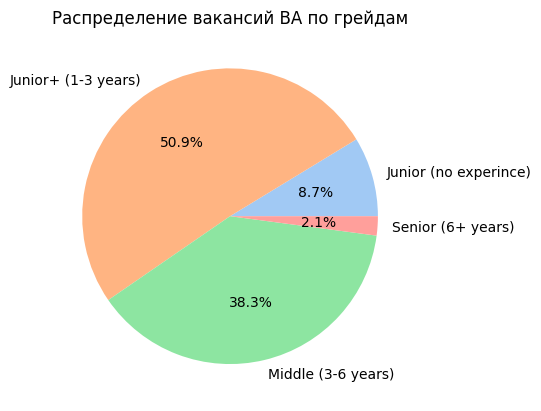

In [ ]:
plt.pie(x=ba_size['perc_of_total'], labels=ba_size['experience'], colors =sns.color_palette('pastel')[ 0:5 ], autopct='%1.1f%%')
plt.title("Распределение вакансий BA по грейдам")
plt.show()

In [ ]:
da_size = grade_size_estimator(df_da)
da_size

,experience,count,perc_of_total
0,Junior (no experince),25,3.2
1,Junior+ (1-3 years),387,49.2
2,Middle (3-6 years),355,45.2
3,Senior (6+ years),19,2.4


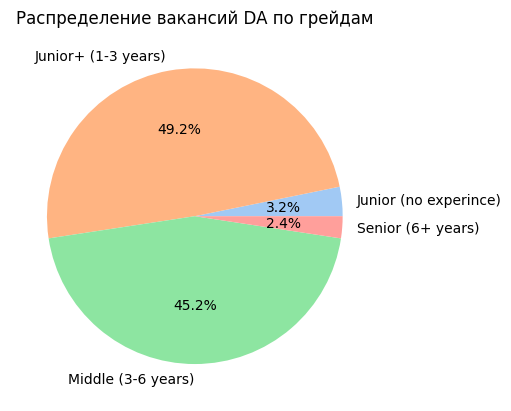

In [ ]:
plt.pie(x=da_size['perc_of_total'], labels=da_size['experience'], colors =sns.color_palette('pastel')[ 0:5 ], autopct='%1.1f%%')
plt.title("Распределение вакансий DA по грейдам")
plt.show()

На основании данных графиков можно сделать следующие выводы:
- абсолютные новички (джуны без опыта) не пользуются большим спросом ни в одном направлении анализа данных. Это обусловленно экономической конъюнктурой, так как бизнес не может себе позволить иметь в штате сотрудника, не принасящего прибыль сразу
- большие доли имеют джуны+ и мидлы. Это обусловленно тем, что данные грейды больше всего подходят для оперативной интеграции во внутренние процессы растущей компании. Данной категории сотрудников требуется малое кол-во времени старших коллег, благодаря имеющемуся опыту могут выполнять самостоятельно простые или линейный задачи бизнеса. Поэтому растущие компании наиболее заинтересованы в данных грейдах

Для дальнейших расчетов выведем в переменные все грейды каждого направления Дата Сайенс

In [ ]:
df_ba_jun = df_ba.query('experience == "Junior (no experince)"')
df_ba_junp = df_ba.query('experience == "Junior+ (1-3 years)"')
df_ba_mid = df_ba.query('experience == "Middle (3-6 years)"')
df_ba_sen = df_ba.query('experience == "Senior (6+ years)"')

df_da_jun = df_da.query('experience == "Junior (no experince)"')
df_da_junp = df_da.query('experience == "Junior+ (1-3 years)"')
df_da_mid = df_da.query('experience == "Middle (3-6 years)"')
df_da_sen = df_da.query('experience == "Senior (6+ years)"')

Так как разбивка скилов по категориям "Хард" и "Софт" была выполнена не идеально, имеет место рассматривать требуемые работадателями навыки одновременно, так как наличие или отсутствие данных категорий в выборке может послужить важным инсайтом. Также, как было указно в ранее выведенных круговых диаграммах и таблицах, кол-во вакансий на различные грейды значительно различается. Соответственно, мной была выведена следующая система частотности встречания навыков в зависимотси от грейда:
- джун без опыта - 15 раз;
- джун с опытом - 50 раз;
- мидл - 35 раз;
- сеньор - 5 раз

Выведем функцию, которая будет строить барплоты по категориям встречаемых навыков. Начинаем с БА

In [ ]:
def hard_skill_by_grade(dataframe, n):
  var_d = skills_for_graph(dataframe, 'key_skills_from_key_skills_field', n).reset_index()
  var_d['cat'] = var_d.apply(cat_condenser, axis=1)
  var_d['perc'] = round(var_d['count']/len(df_ba_jun)*100,2)
  sns.barplot(x='perc', y='cat', data=var_d, hue='cat', legend=False).set(title=str(dataframe['experience'].unique()))
  plt.show()

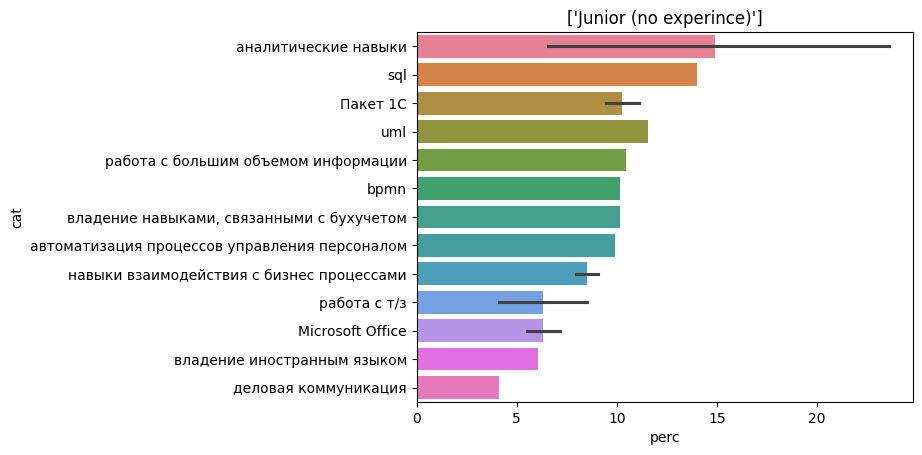

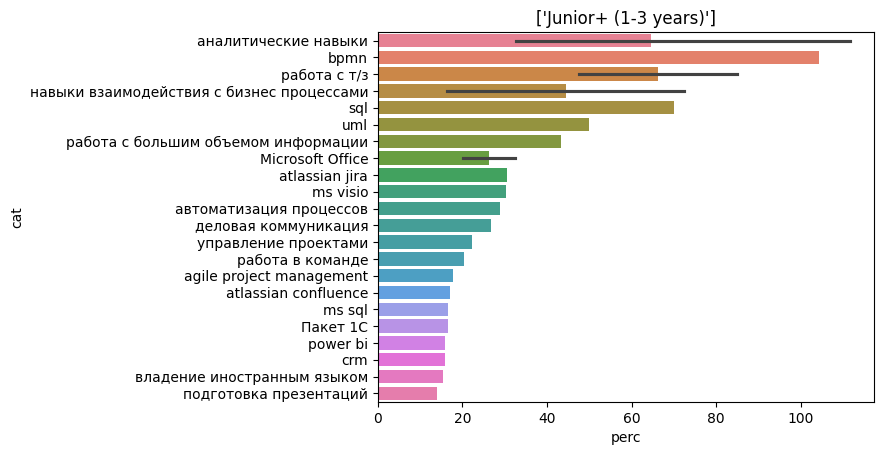

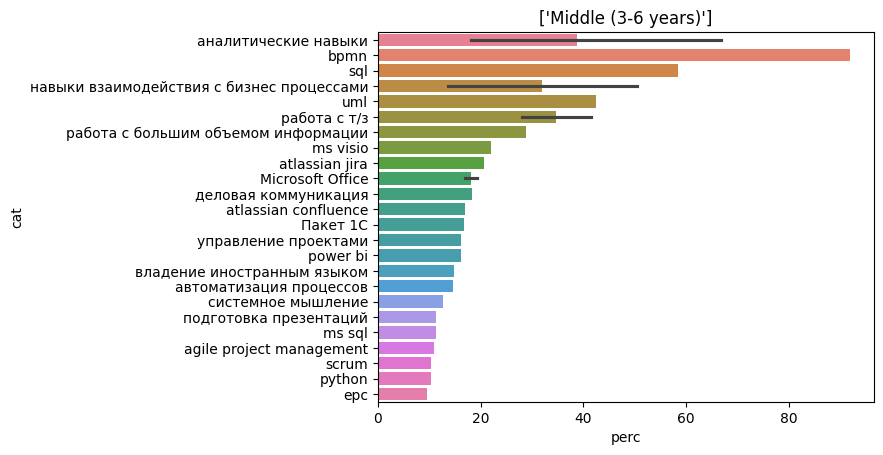

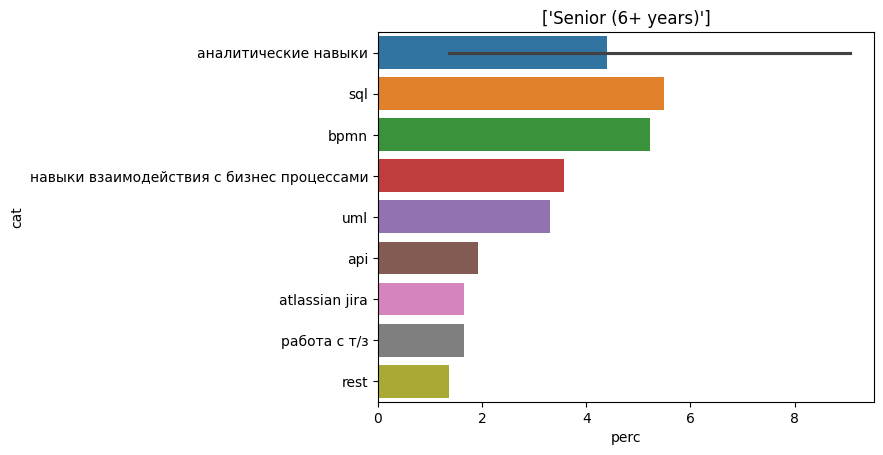

In [ ]:
for i, z in zip([df_ba_jun, df_ba_junp, df_ba_mid, df_ba_sen],[15,50,35,5]):
    hard_skill_by_grade(i,z)

На основании данных графиков можно сделать следующие выводы относительно каждого грейда:
  1. Джуны без опыта. Для данной категории можно встретить минимальное кол-во требований к владению "хард" скилами. Ведь действительно, работадателю нужны навыки, которые можно применить в работе, а у данной категории соискателей нету данного опыта. Поэтому те немногоие вакансии, расчитанные на джунов без опыта, забрасывают сеть максимально широко: бизнес-анализ, sql, 1c, бухучет, различные "софт" навыки, как деловая переписка, работа в команде и работа с большим объемом информации. Экономическая конъюнктура позволяет очень тщательно выбирать данных сотрудников, любая характеристика и/или навык соискателя могут оказаться решающими.
  2. Джуны с опытом и мидлы. Для данной категории встречаются более конкретные требования по стэку, так как в отличии от джунов без опыта, которых берут "на вырост", сотрудники данного грейда способны самостоятельно выполнять различные задачи, поставленные бизнесом. Соответственно, их взаимная совместимость во многом будет определяться стеком, который владеет тот или иной соискатель-специалист. Из этого выходит повышенно кол-во специфичных скилов, как опыт работы в различных CRM системах, построение логических схем, управление процессами и т.д.
  3. Сеньоры. Специалисты данной категории, засчет их больших компетенций и опыта, ищутся штучно, как правило в различные департаменты с целью не простого расширения штата для дальнейшого роста бизнеса, а с целью компетентного управления и направления бизнес процессов данных отделов. Соответственно, многие вакансии для данного грейда имеют уникальные требования, так как их цель - найти идеального руководителя/старшего сотрудника, который сможет использовать свой объемный опыт для улучшения метрик отдела

Далее рассмотрим скилы для DA. Так как общее кол-во вакансий меньше, чем на BA, кол-во требуемой частотности встречаемсоти навыков следующее:
- джун без опыта - 3 раза;
- джун с опытом - 10 раз;
- мидл - 10 раз;
- сеньор - 3 раза

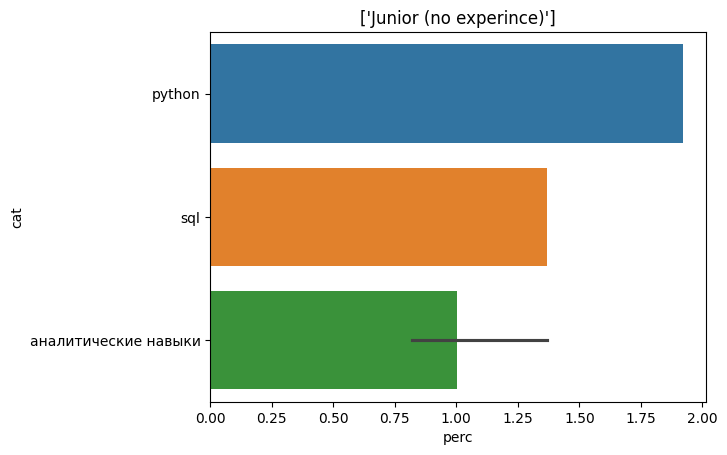

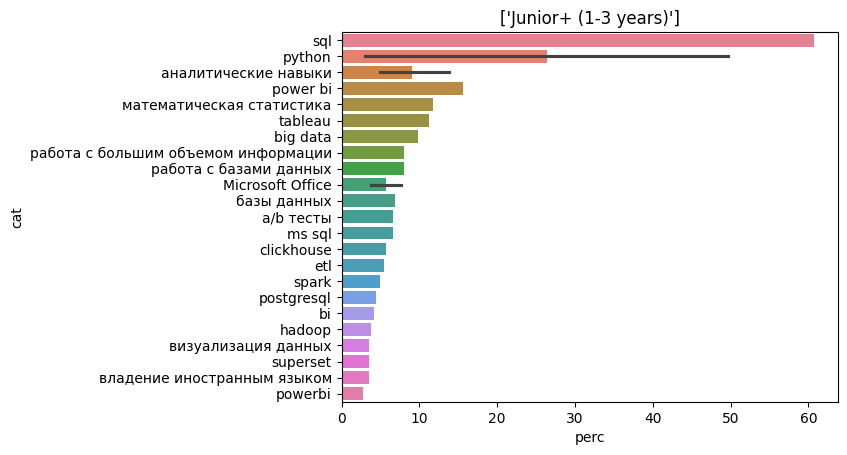

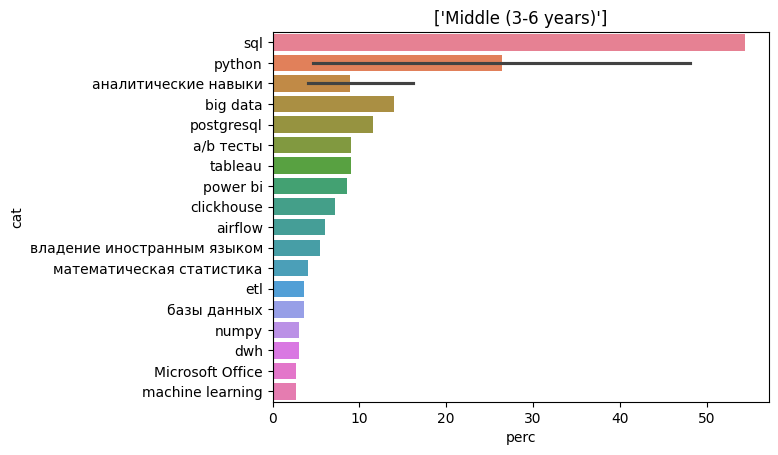

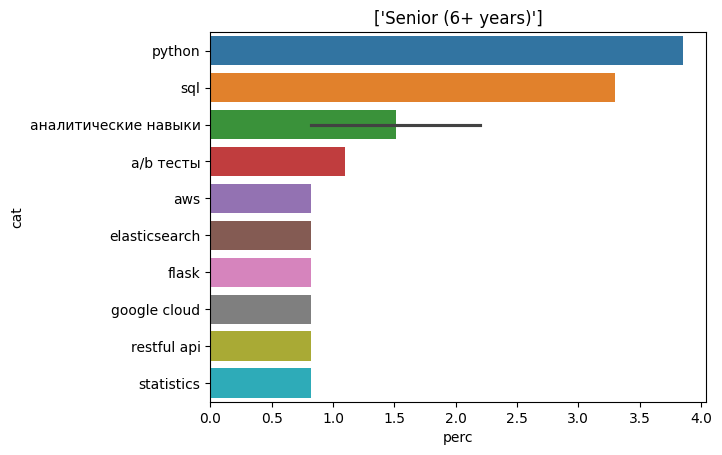

In [ ]:
for i, z in zip([df_da_jun, df_da_junp, df_da_mid, df_da_sen],[3,10,10,3]):
    hard_skill_by_grade(i,z)

На основании данных графиков можно сделать следующие выводы относительно каждого грейда:
  1. Джуны без опыта. Так как ДА - более теоритически сложное направление, чем BA, для "зеленых" джунов большую роль играет их теоретическая подкованность. Важны не столько сами навыки (опыта применения которых у джунов все равно будет мало), сколько факт наличия релевантного высшего образования. Соответсвенно, в части навыков спрашивают только базовые Python и его библиотеки, SQL, и процессы, связанные с анализом данных
  2. Джуны с опытом и мидлы. Схожая ситуцаия с этими грейдами в БА. С опытом бизнесу становится понятным, что данные специалисты способны оперативно влиться в рабочие процессы и начать приносить прибыль. Соответственно проверяется знание применяемых местно утилит, чтобы отобрать наиболее подходящего соискателя. Проверяются, помимо фундаментальных Python и SQL, знания различных баз данных, утилит и инструментов для визуализации
  3. Сеньоры. Аналогично с сеньорами направления БА, данных руководителей и/или старших специалистов ищут на конкретные места, поэтому требования к ним также практически уникальные. Как видно из графика, как правило требуется опыт пользования конкретными архитектурами обмена данных, которыми пользуется данная компания

Таким образом, можно выделить идеального кандита для каждого грейда. Данные выводы применимы и для БА, и для DA, однако для DA в целом будет дополнительное требование
- Джун без опыта. Данный кандидат должен обладать хорошими теоритическими знаниями (python, sql, инструмент для визуализации данных), уметь разбираться в больших объемах информации и, что самое главное, учитывая ситуацию на рынке труда, иметь некую особенность, которая будет положительно отличать его от других соискателей. Будь это пет-проект, дополнительные курсы, стажировки и т.д., джуну необходимо выделяться
- Джун с опытом. Данный кандидат должен достаточно уверенно владеть необходимыми для работы хард скилами, чтобы самостоятельно справляться с задачами небольшой трудности. Имеющийся производственный опыт необходимо описывать в резюме, чтобы бизнес видел, что соискатель уже сталкивался с различными проблемами и решал их.
- Мидл. Данный кандидавт уже имеет достаточно большой опыт, чтобы уверенно выполнять большую часть линейныйх и экстренных задач, которые возникают у бизнеса. Уверенное пользование основными хард скилами (работа с данными, выгрузка их из различных систем, визуализация), а так же глубокое понимание сути процессов должно отражаться в резюме. Набиольшую востербованность имеют специалисты, которые могут уверенно работать в различных системах управления трудовым процессом, могут анализировать и визуализировать данные.
- Сеньор. От данных кандидатов ожидается уская специализация в какое-то конкретное направление, будь то анализ конкретной отрасли, или определенные архитектуры и/или библиотеки. Идеальный кандидат должен обладать именно тем опытом, который требуется каждой конкретной компании

Для DA большую роль играет уровень образования и владение новыми технологиями, так как для данного направления это играет большую роль. Соответственно, идеальный кандидат будет иметь соответствующую научную степень и/или научные работы/разработки в части Data Science

##3.2 Определение типичного места и условий работы

Выведем функцию, которая позволит определить топ 10 нанимателей в рассматриваемом периоде для каждого грейда

In [ ]:
def empl_popul(dataframe):
  var=dataframe.groupby('employer')['id'].size().reset_index(name='count').sort_values(by='count',ascending=False).head(10)
  sns.barplot(x='count', y='employer', data=var, hue='employer', legend=False).set(title=str(dataframe['experience'].unique())+" топ 10 работадателей")
  plt.show()

Выведем ТОП-10 нанимателей для каждого грейда БА

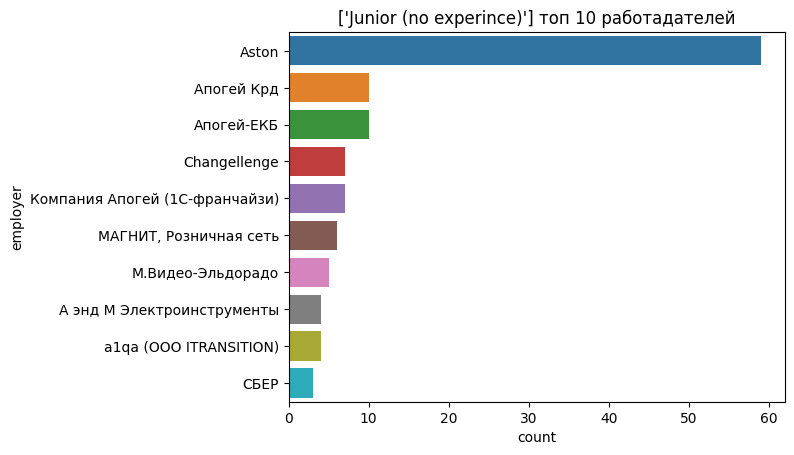

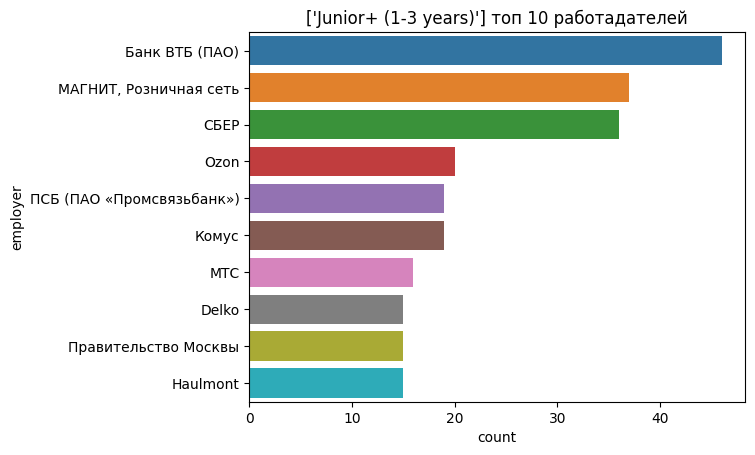

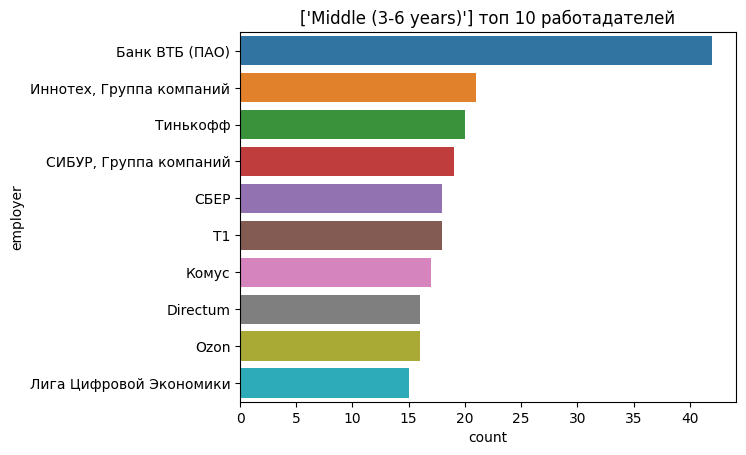

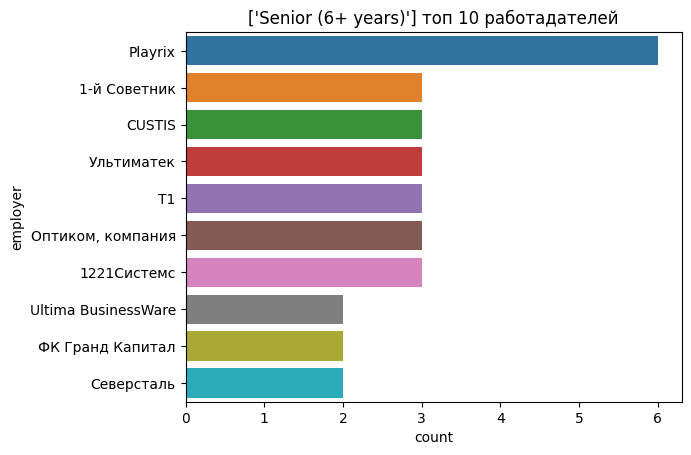

In [ ]:
for i in [df_ba_jun, df_ba_junp, df_ba_mid, df_ba_sen]:
    empl_popul(i)

Можно выделить следующие особенности работодателей, разбив их по грейдам:
- "зеленых" джунов не сильно хотят брать большие компании, у которых есть много даты для анализа. В основном, это средние-малые компании по разработке софта
- джунов+ и мидлиов охотно берут себе гиганты экономики, такие как банки, розничные сети, дистрибьютеры и даже правительство. Видно, что в этих грейдах крупные работадатели заинтересованны больше всего
- сеньоров ищут поштучно и, как правило, более узконаправленные организации. На данный момент в такие компании включаются компании по разработке мобильных игр, АйТи решения

Рассмотрим работадателей для ДА

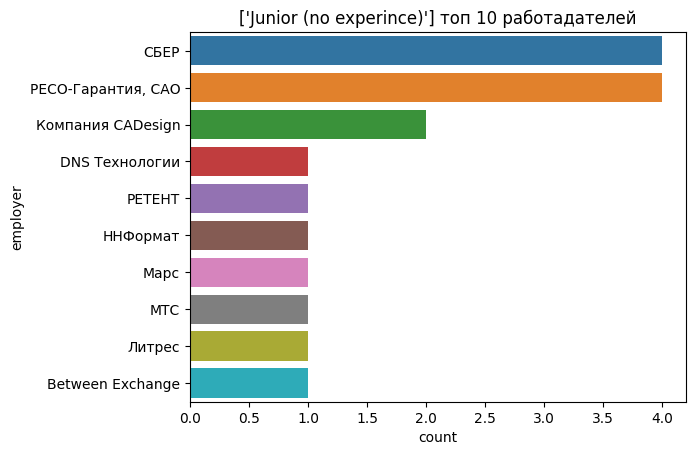

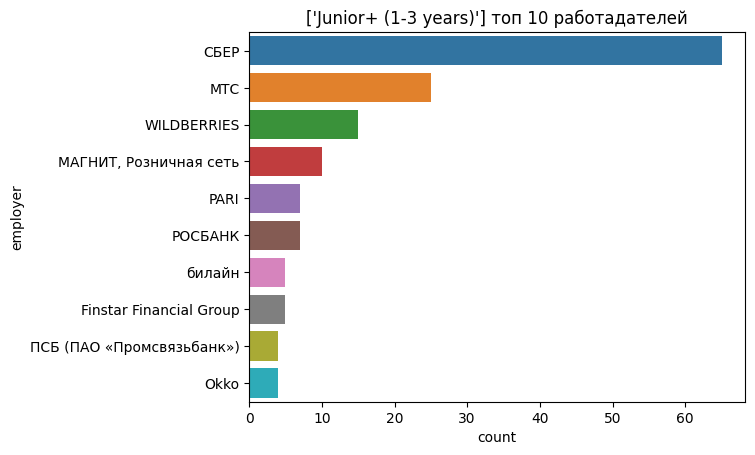

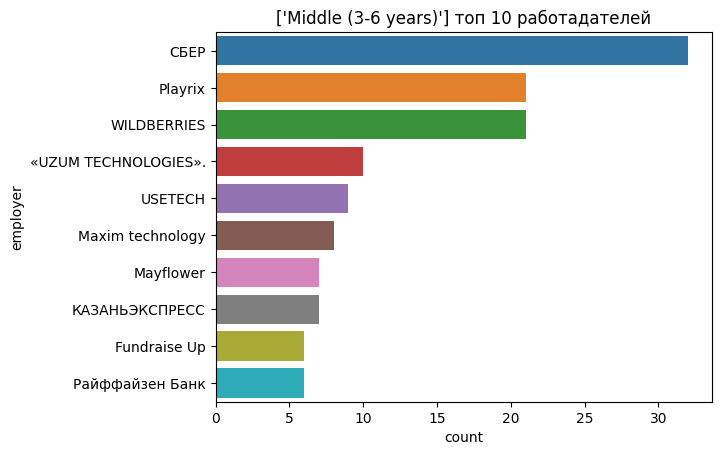

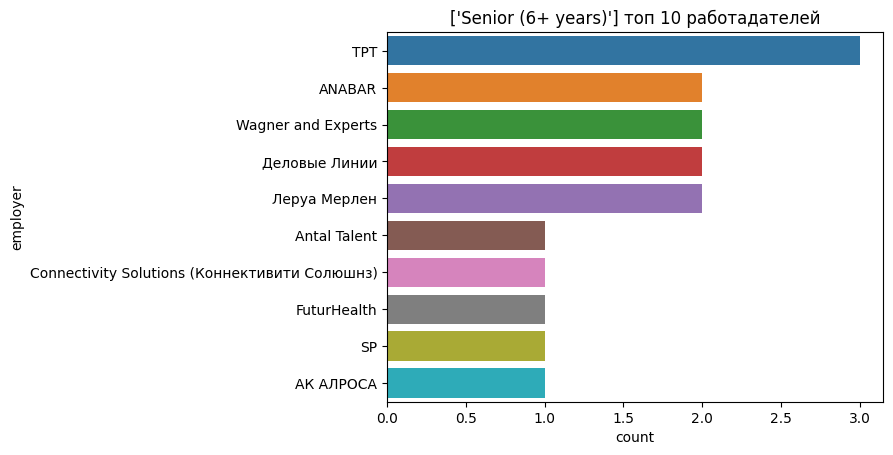

In [ ]:
for i in [df_da_jun, df_da_junp, df_da_mid, df_da_sen]:
    empl_popul(i)

В целом, ситуация с работадателями схожа для соискателей в БА, за одним важным исключением - так как для ДА требуется больее серезная академическая база, это является достаточным основанием для повышения доверия со стороны больших компаний. Таким образом, лидерами работадателей среди джунов без опыта являются не средние компании по разработке софта для 3-их предприятий, а большие компании, такие как Сбер, МТС, wildberries и Магнит

Перед тем, как провести анализ по предлагаемым уровням компенсации соискателей, необходимо определить, в скольки вакансиях эти данные присутствуют

In [ ]:
for i in df_ba['experience'].unique():
  print(i, round((round((len(df_ba.query('avg_salary.notnull() & experience==@i'))/len(df_ba)),3)*100),2))
print()
for i in df_da['experience'].unique():
  print(i, round((round((len(df_da.query('avg_salary.notnull() & experience==@i'))/len(df_da)),3)*100),2))

Junior+ (1-3 years) 14.2
Middle (3-6 years) 7.5
Junior (no experince) 4.1
Senior (6+ years) 0.4

Junior+ (1-3 years) 6.2
Middle (3-6 years) 5.0
Senior (6+ years) 1.0
Junior (no experince) 1.1


Таким образом, можно сделать вывод что в вакансиях БА данные о зарплате присутствуют примерно в ~10% вакансий, а в вакансиях DA - в ~4%. Соответственно, можно сделать следующие выводы:
- дальнейшие расходы не обязательно будут отображать действительность;
- в данных сферах принято вести активные переговоры о компенсациях, что ожидается от соискателея с повышением их грейда (чем выше грейд, тем меньше процент указания з/п)

Выведем функцию для визуализации средних и медианных значений указанных заработных плат

In [ ]:
def avg_salary_by_grade2(dataframe, n):
  var = dataframe.groupby('experience')['avg_salary'].agg(['mean','median']).reset_index()
  var.plot.bar(x='experience', y=(['mean', 'median']), rot=0, figsize=(10,5), title=str(n) + ' средние и медианные зарплаты')

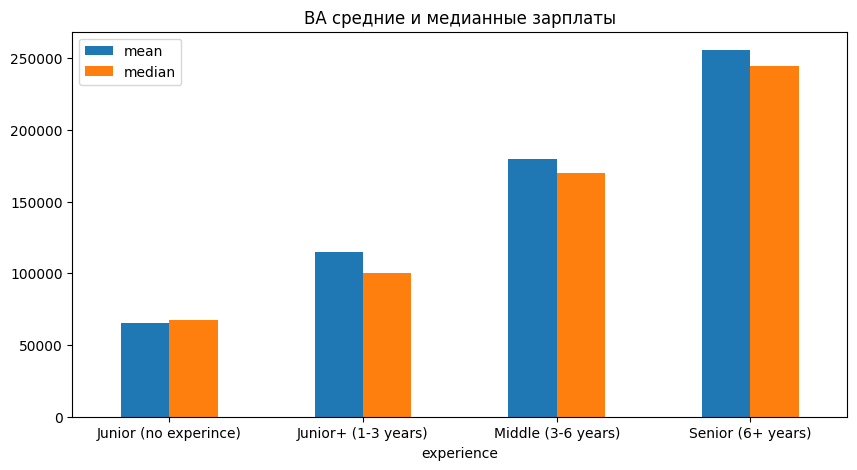

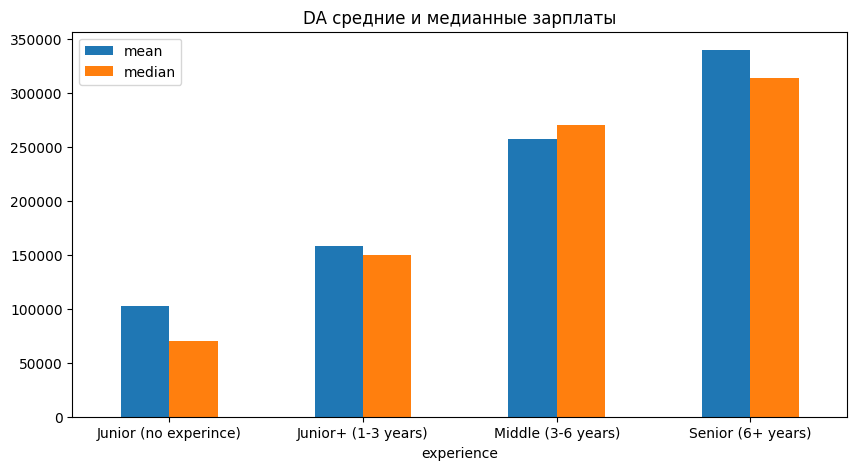

In [ ]:
for i,z in zip([df_ba, df_da],['BA','DA']):
  avg_salary_by_grade2(i,z)

In [ ]:
df_da['avg_salary'].median()

200000.0

In [ ]:
df_ba['avg_salary'].median()

105000.0

Можно сделать следующие выводы:
- ДА зарабатывают примерно в два раза больше, чем БА
- у обоих направления схожая динамика роста (каждый следующий грейд получает в среднем в ~1,5 раза больше, чем предыдущий)

Рассмотри графики и типы занятости БА и ДА

In [ ]:
def grade_schedule_estimator(dataframe):
  var = (dataframe.groupby('schedule')['schedule'].size()
  .reset_index(name='count'))
  var['perc_of_total'] = round(var['count']/len(dataframe),3)*100
  return var

In [ ]:
def grade_employment_estimator(dataframe):
  var = (dataframe.groupby('employment')['employment']
         .size().reset_index(name='count'))
  var['perc_of_total'] = round(var['count']/len(dataframe),3)*100
  return var

In [ ]:
valid_stat = {1,2}
def visual(dataframe, n):
  if n not in valid_stat:
    raise ValueError("visual: n must be one of %r." %valid_stat)
  if n == 1:
    for i in dataframe['experience'].unique():
      var = grade_schedule_estimator(dataframe.query('experience==@i'))
      plt.title("График работы для грейда " + str(i))
      plt.pie(x=var['perc_of_total'],
              labels=var['schedule'],
              colors =sns.color_palette('pastel')[ 0:5 ],
              autopct='%1.1f%%')
      plt.figure(figsize=(15,6))
      plt.show()
  if n == 2:
    for i in dataframe['experience'].unique():
      var = grade_employment_estimator(dataframe.query('experience==@i'))
      plt.title("Тип занятости для грейда " + str(i))
      plt.pie(x=var['perc_of_total'],
              colors =sns.color_palette('pastel')[ 0:5 ],
              autopct=lambda p: format(p, '.2f') if p > 25 else None)
      plt.legend(loc=3, labels=var['employment'])
      plt.figure(figsize=(15,6))
      plt.show()

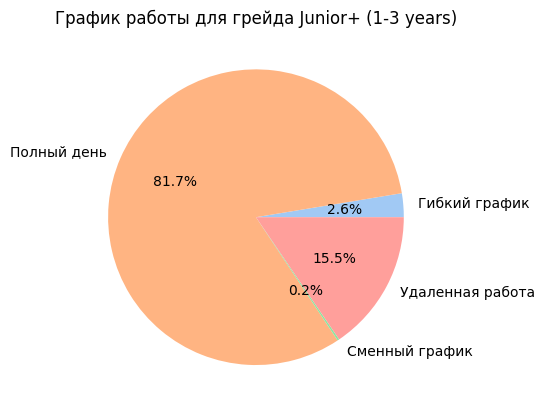

<Figure size 1500x600 with 0 Axes>

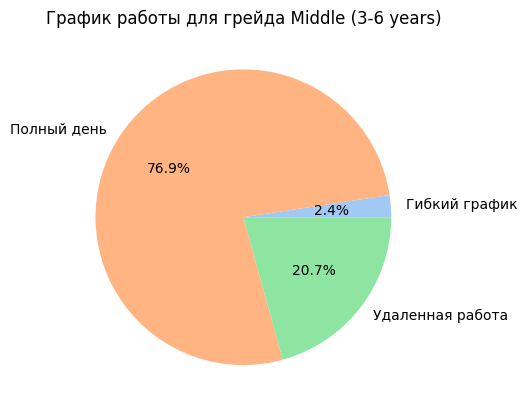

<Figure size 1500x600 with 0 Axes>

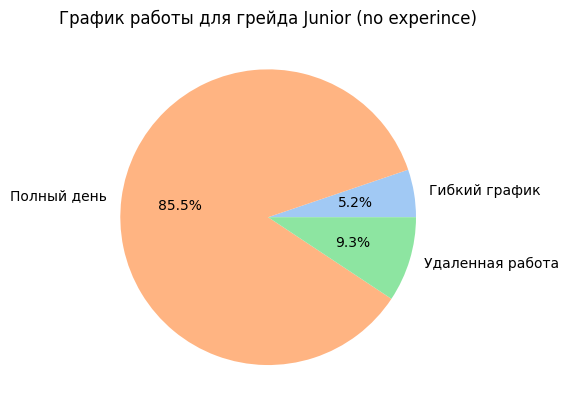

<Figure size 1500x600 with 0 Axes>

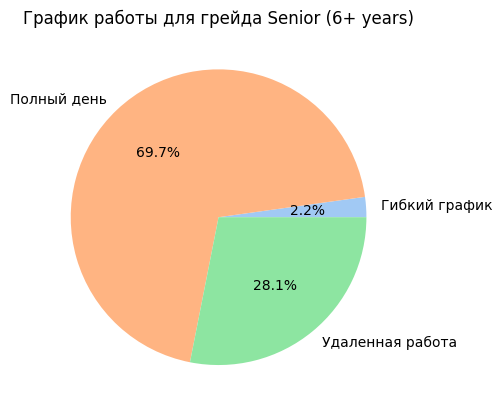

<Figure size 1500x600 with 0 Axes>

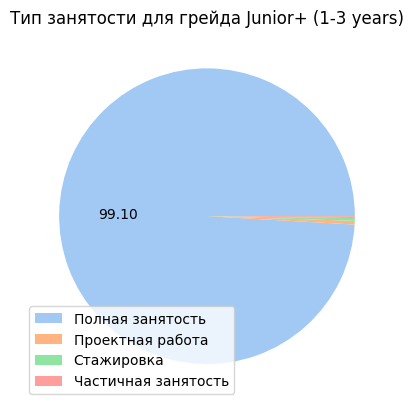

<Figure size 1500x600 with 0 Axes>

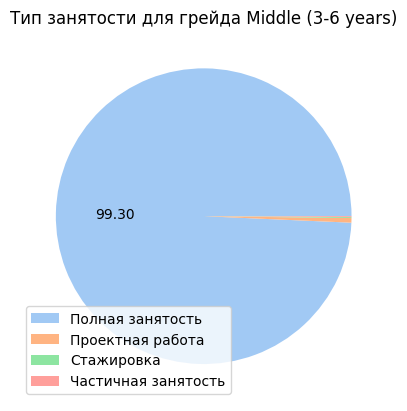

<Figure size 1500x600 with 0 Axes>

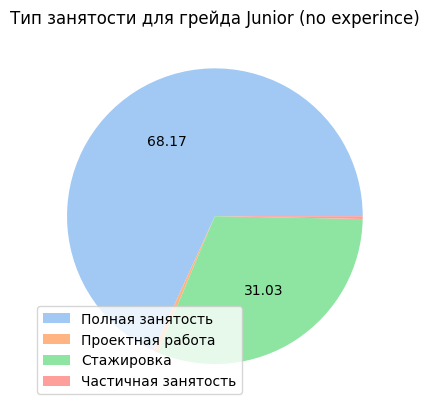

<Figure size 1500x600 with 0 Axes>

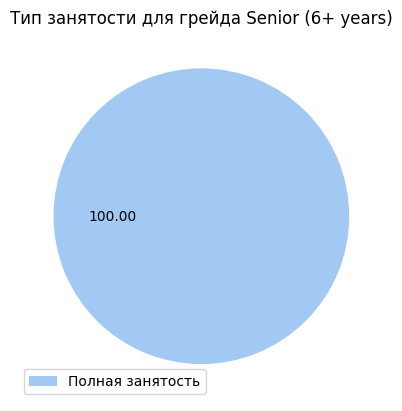

<Figure size 1500x600 with 0 Axes>

In [ ]:
visual(df_ba,1)
visual(df_ba,2)

Для БА можно сделать следующие выводы:
- основной график, который указывается - это полный рабочий день. Однако с повышением грейда большую долю начинает занимать удаленный рабочий день
- у всех грейдов кроме джун имеется полная занятость. У джунов примерно треть это стажировка

Рассмортим ДА

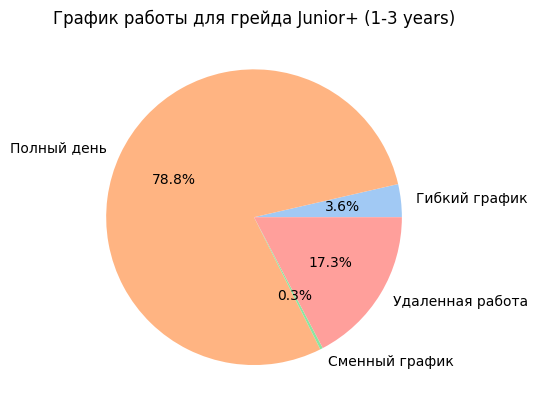

<Figure size 1500x600 with 0 Axes>

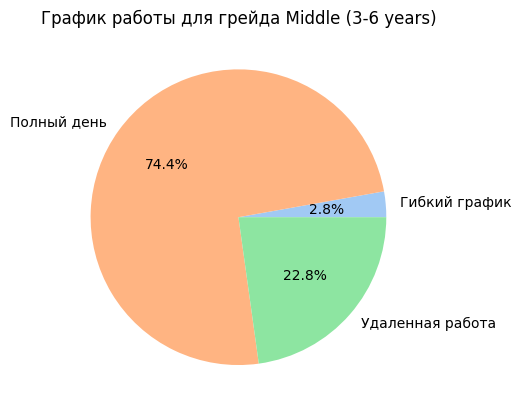

<Figure size 1500x600 with 0 Axes>

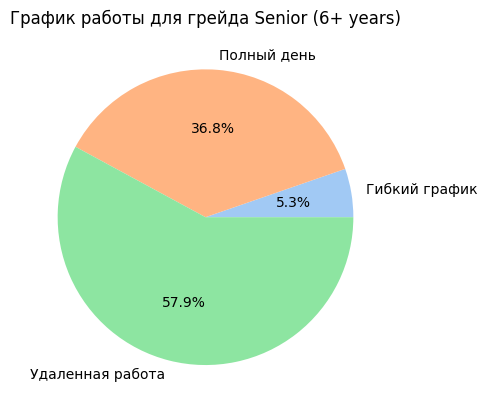

<Figure size 1500x600 with 0 Axes>

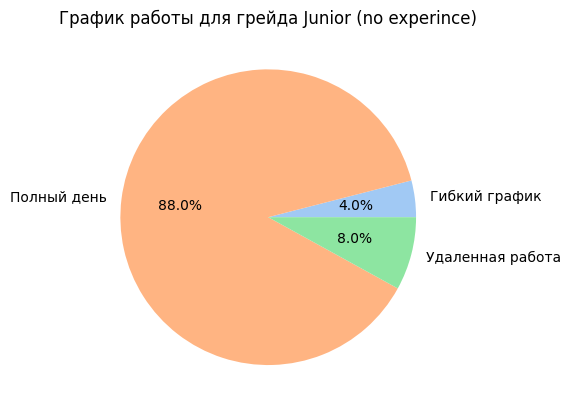

<Figure size 1500x600 with 0 Axes>

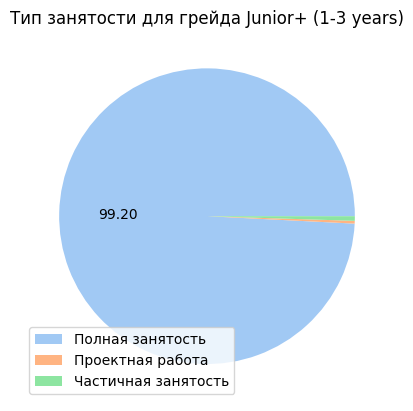

<Figure size 1500x600 with 0 Axes>

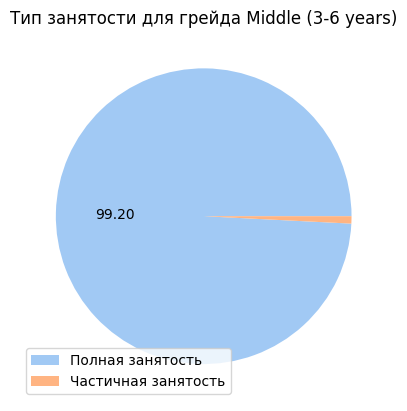

<Figure size 1500x600 with 0 Axes>

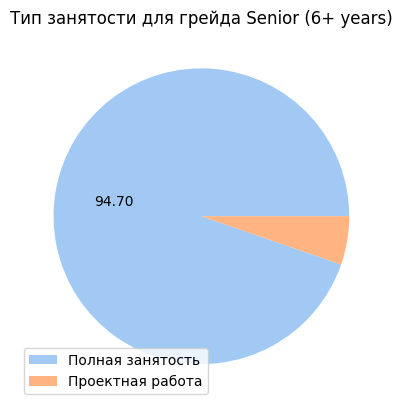

<Figure size 1500x600 with 0 Axes>

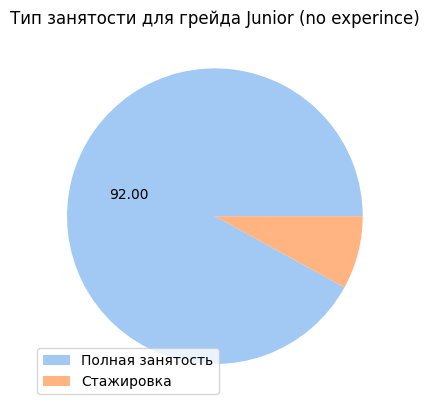

<Figure size 1500x600 with 0 Axes>

In [ ]:
visual(df_da,1)
visual(df_da,2)

По сравнению с БА наблюдаются следующие закономерности:
- гораздо более превалирует удаленная работа, начинаясь даже с джуниор позиций
- помимо привычных стажировок для джунов появляется тип занятости "проектная работа" для сеньёров, что подрузамевает заинтересованность компаний в наеме сотрудников для решения конкретной бизнес цели

Таким образом, можно вывести типичное место работы для различных грейдов:
- джун будет работать в небольшоей фирме по разработке софта(БА) или в крупном компании (да). Возможно, это будет стажировка. Потенциален удаленный рабочий день. Ожидания по зп - 50к для БА и 90к для ДА
- джун+ и мидл будут полноценно трудоустроенны в крупных компаниях. БА будет работать в офисе, ДА будет работать на удаленном режиме. Ожидания по зп - БА джун+ - 100к, мидл - 150к, ДА джун+ - 150к, мидл - 225к
- сеньоры могут быть как полноценно трудоустроенны в крупных компаниях, так и заниматься временной деятельностью по реализации конкретных проектов. Почти наверняка будет удаленный рабочий режим. Зарплатные ожидания - 250к БА, 300к ДА

#4.Динамика кол-ва вакансий

Перед исследованием динамики размещения вакансий, необходимо отметить, что в базы данных вошли вакансии с период осени 2023 года - конец января 2024 года. Это несколько ограничивает возможные инсайты, которые можно получить из данной информации

Визуализируем динамику размещения вакансий

In [ ]:
def vacany_dynamic(dataframe, n):
  var = dataframe.groupby(['experience', 'month'])['id'].size().reset_index(name='count')
  sns.lineplot(data=var, x='month', y='count', hue='experience', legend='full').set(title='Динамика вакансий для ' + str(n))

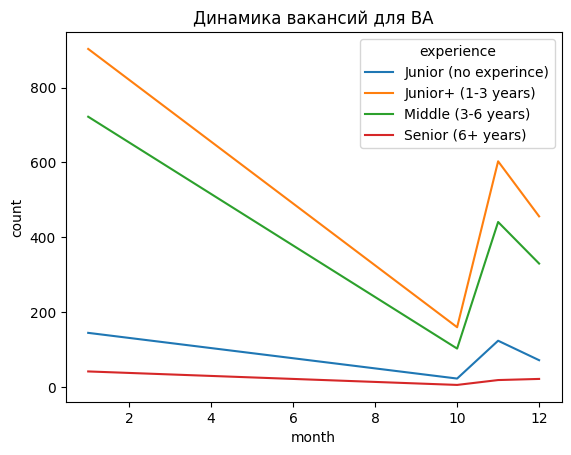

In [ ]:
vacany_dynamic(df_ba, 'BA')

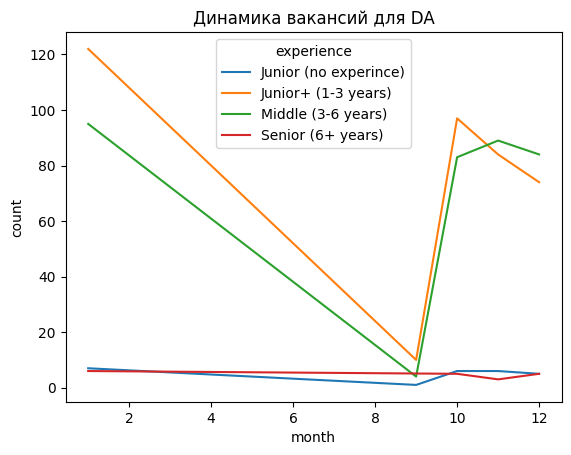

In [ ]:
vacany_dynamic(df_da, 'DA')

Общая тенденция - пик размещенных вакансий в январе. Это можно объяснить новым финансовым годом для компании, обнародывания новых планов и целей, что ведет к необходимым изменениям в штате сотрудников для их достижения.

Также виден стабильно низкий спрос на джуниоров без опыта и сеньёров. Первое обосновывается отсутствием желания инвестировать в кадры без гарантий возврата данных инвестиций, второе обосновывается ситуативностью нужды в высококвалифицированных кадрах-руководителях

#5.Выводы

Изучив данные, размещенные на HH.ru, можно сделать следующие рекоммендации для различных грейдов:
1. Джуниорам необходимо иметь что-то, что позволит им отличиться от большинства соискателей. Вакансий на этот грейд мало, а желающих много
2. Джун+ необходимо продолжать наполнять резюме проффесиональным опытом, активно развиваться в области, искать себя. На данный грейд самое большое кол-во вакансий, так что есть возможность для выбора
3. Мидлам необходимо начать направлять свой уже достаточно обширный опыт в какую-либо нишу, которая им нравится. Для дальнейшего развития требуется узкая специализация на каком-то определенном направлении анализа
4. У сеньоров могут возникнуть проблемы с поиском работы, так как из-за небольшого кол-ва вакансий можно просто не найти желаемую должность. Однако, их серьезный опыт в индустрии поможет ее найти рано или поздно